In [1]:
# Fourier transform, 푸리에 변환
# 이미지의 밝기의 변화를 주파수로 변환하는 방법
import cv2
import numpy as np
img = cv2.imread("d:/data/images/penguin.png")

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
# dft() 푸리에 변환 함수(영상을 주파수로 변환), 이미지를 실수형으로 변환한 후 입력
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
#변환된 주파수를 재배열(주파수가 0이면 가운데로, 주파수가 커질수록 가장자리로)
dft_shift = np.fft.fftshift(dft)
# magnitude() 2차원 벡터값 계산 함수
out = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :,1]))
# Inverse Fourier Transform, 역 푸리에 변환 : 주파수를 영상으로 변환
inverse_shift = np.fft.fftshift(dft_shift)
inverse_dft = cv2.dft(inverse_shift, flags=cv2.DFT_INVERSE)
out2 = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

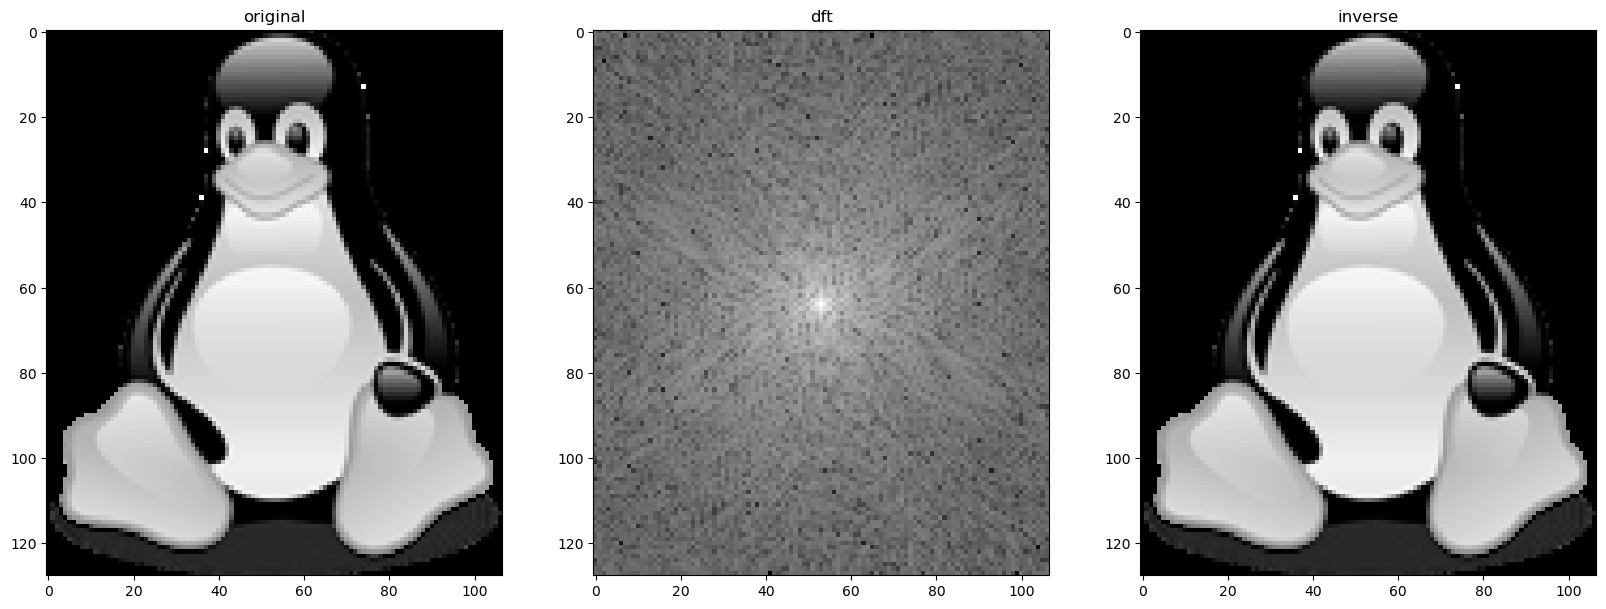

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(gray, cmap='gray') # 원본 이미지
plt.title('original')
plt.subplot(132)
plt.imshow(out, cmap='gray') # 주파수 변환 이미지
plt.title('dft')
plt.subplot(133)
plt.imshow(out2, cmap='gray') # 역 푸리에 변환 이미지
plt.title('inverse')
plt.show()